# PHÂN TÍCH DỮ LIỆU, ĐẶT VÀ TRẢ LỜI CÂU HỎI

## 1. Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Đọc dữ liệu từ file csv

In [2]:
anime23_df = pd.read_csv('anime23_preprocessing.csv')
anime23_df.head()

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Finished Airing,Bandai Visual,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,Finished Airing,"Sunrise, Bandai Visual",Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Finished Airing,Victor Entertainment,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001


## 3. Đặt câu hỏi

### Câu 1

#### Những studio sản xuất được nhiều phim có đánh giá cao có đặc điểm gì?

- Rất nhiều chương trình mà ai đó có xu hướng thích hoặc có điểm số tốt đều đến từ cùng một studio, do đó ta nên xem xét chúng.
- Bắt đầu bằng cách lọc để chỉ xem các hãng phim anime hàng đầu (các studio sản xuất được nhiều bộ phim có `Rank` cao).
- Trả lời câu hỏi này sẽ giúp những người đang tìm kiếm những bộ phim anime chất lượng để xem có thêm gợi ý để tìm kiếm dựa trên các studio hàng đầu.
- Trả lời câu hỏi này sẽ giúp chúng ta biết được đặc điểm của những studio thành công và khác biệt của họ trong ngành.

### Câu 2

### Câu 3

## 4. Trả lời câu hỏi

### Câu 1

#### Những studio sản xuất được nhiều phim có đánh giá cao có đặc điểm gì?

Trả lời câu hỏi trên sẽ giúp chúng ta tìm ra được những studio thành công và đặc điểm của họ.

Trả lời câu hỏi trên cũng giúp những người đang tìm kiếm anime hay để xem sẽ có những gợi ý rõ ràng hơn để tìm kiếm phim xem. Đặc biệt là đối với những người mới bắt đầu xem anime, họ có thể lựa chọn các anime đến từ những studio được đánh giá cao.

Để trả lời cho câu hỏi trên, chúng ta cần lấy ra bộ dữ liệu gồm các anime top đầu. Nhóm em quyết định lấy 1000 anime xếp theo `Rank` trong bộ dữ liệu (gần bằng 5% tổng số anime).

Đầu tiên, vì cột Studios là kiểu chuỗi, nên phải split nó ra và explode để mỗi cột chỉ có một giá trị của Studio.

In [3]:
ques1_df = anime23_df
ques1_df['Studios'] = ques1_df['Studios'].str.split(', ')
studios_explode = ques1_df.explode('Studios')
#Loại bỏ các Studios là Unknown
studios_explode = studios_explode[studios_explode['Studios'] != 'UNKNOWN']
studios_explode.head()
#Xem thử kết quả sau khi explode

,anime_id,Name,Score,Genres,Type,Episodes,Status,Producers,Studios,Source,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Finished Airing,Bandai Visual,Sunrise,Original,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,Finished Airing,"Sunrise, Bandai Visual",Bones,Original,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Finished Airing,Victor Entertainment,Madhouse,Manga,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Finished Airing,"TV Tokyo, Dentsu",Toei Animation,Manga,PG - Children,4240.0,5126,14,6413.0,15001


Tiếp theo, ta phải lọc các bộ anime thỏa mãn điều kiện.

In [4]:
ques1_df = studios_explode[studios_explode['Rank']!=0]
ques1_df = ques1_df[ques1_df['Rank']<=1000]

Tiếp theo, cần tính số bộ phim tốt của mỗi studio.

In [5]:
top_anime_count = ques1_df.groupby('Studios')['Score'].count().sort_values(ascending = False)

Lọc dữ liệu để chỉ lấy 15 studio có nhiều anime rank cao nhất

In [6]:
top_studios = top_anime_count.nlargest(15)

Như vậy ta đã tìm ra được 15 studio sản xuất được nhiều bộ phim có đánh giá tốt cùng với số bộ phim tốt được sản xuất là:

In [7]:
top_studios

Studios
Madhouse             63
Production I.G       63
Sunrise              55
TMS Entertainment    52
Bones                43
Kyoto Animation      37
Toei Animation       36
A-1 Pictures         34
J.C.Staff            34
Shaft                33
Pierrot              29
Studio Deen          25
ufotable             20
MAPPA                20
Wit Studio           19
Name: Score, dtype: int64

#### Vẽ biểu đồ thể hiện tỉ lệ anime top đầu của các studio

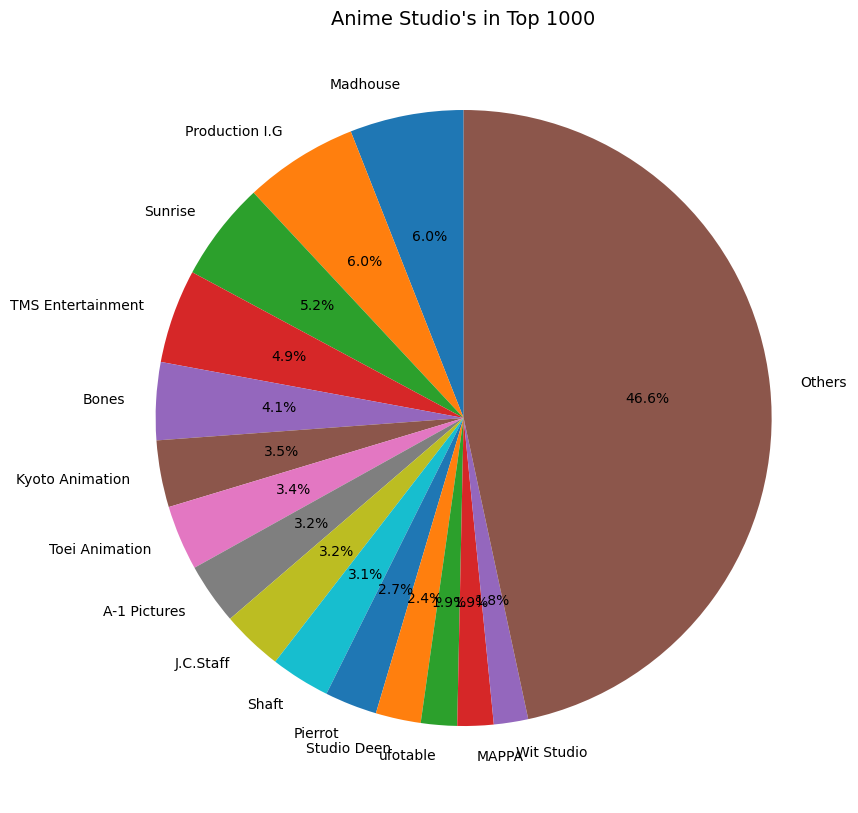

In [8]:
data = top_studios.copy()
# Gộp các studio còn lại vào nhóm "Others"
data['Others'] = ques1_df['Studios'].value_counts().sum() - top_studios.sum()
# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 10))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title("Anime Studio's in Top 1000", fontsize=14)
plt.show()

Nhận xét:
- Biểu đồ trên có thể giúp người xem xác định top 15 studio thành công cùng với tỉ lệ góp mặt các tác phẩm của những studio này trong top 1000 phim tốt nhất. Người xem bước đầu đã có gợi ý để lựa chọn phim dựa trên studio.
- Madhouse và Production I.G là hai studio có số lượng anime nhiều nhất trong top 1000 anime được đánh giá cao nhất, đều chiếm tỉ lệ 6.0%. Sunrise là studio thành công kế tiếp trong top 3 với tỉ lệ 5.2%.
- Hơn một nửa số bộ phim được đánh giá cao nhất thuộc về top 15 studio hàng đầu trên tổng số hơn 1000 studio.
- Nhìn chung giữa các studio top đầu không có cách biệt quá lớn về số lượng bộ phim hay được sản xuất.
- Tất cả các xưởng phim hàng đầu trong top 15 đều đến từ Nhật Bản.

**Tiếp theo ta sẽ khám phá thêm về đặc điểm của các studio thành công. Để có cái nhìn tổng quan về hoạt động của các studio thì ta sẽ phân tích dựa trên bộ dữ liệu ban đầu có đầy đủ các anime là studios_explode.**

#### Dạng phim mà các studio trên sản xuất là phim truyền hình, anime dài tập hay movie,...?

Thực hiện thống kê về số lượng anime của mỗi loại (Type) cho từng studio

In [9]:
studios_list = top_studios.index
filtered_data = studios_explode[studios_explode['Studios'].isin(studios_list)]
type_counts = filtered_data.groupby(['Studios', 'Type']).size().reset_index(name='Count')
type_counts

,Studios,Type,Count
0,A-1 Pictures,Movie,28
1,A-1 Pictures,Music,5
2,A-1 Pictures,ONA,20
3,A-1 Pictures,OVA,18
4,A-1 Pictures,Special,59
...,...,...,...
88,ufotable,Music,1
89,ufotable,ONA,5
90,ufotable,OVA,7
91,ufotable,Special,21


Vẽ biểu đồ phân bố các dạng phim anime theo từng studio

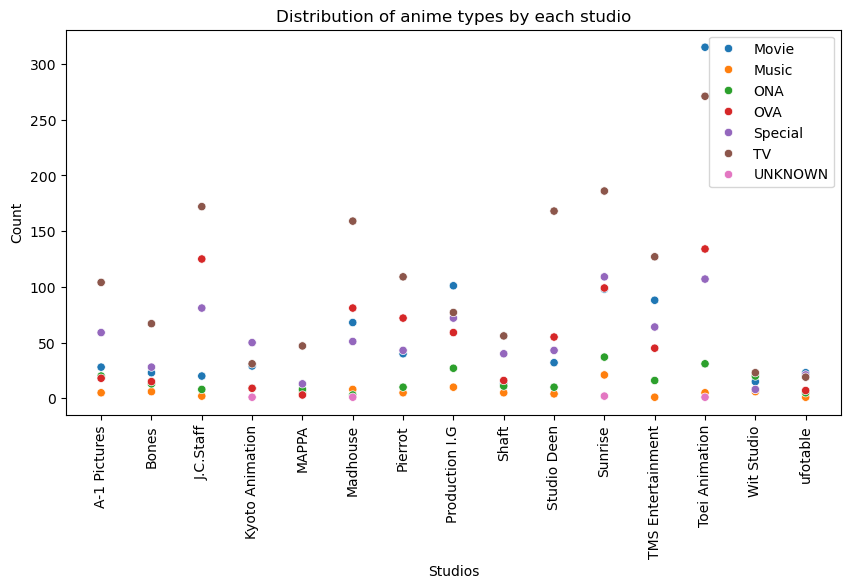

In [10]:
# Vẽ biểu đồ scatterplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Studios', y='Count', hue='Type', data=type_counts, ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of anime types by each studio')
plt.legend(bbox_to_anchor=(1, 1))
# Hiển thị biểu đồ
plt.show()

Nhận xét:
- Các studio đều sản xuất phim hoạt hình đa dạng, đa thể loại chứ không chỉ tập trung ở một dạng phim nhất định.
- Nổi bật nhất phải kể đến phim truyền hình (TV) là dạng phim được hầu hết các studio tập trung sản xuất nhất. Lí do có thể là vì TV là dạng dễ sản xuất và được yêu thích nhất đối với người xem.
- Tuy nhiên, hai hãng phim có khối lượng sản xuất lớn là Toei Animation và Production I.G lại ưu tiên lựa chọn Movie để sản xuất hơn so với TV. Vì vậy, người xem có nhu cầu tìm các bộ phim Movie có thể cân nhắc các phim đến từ hai studio này, sẽ có đa dạng phim để lựa chọn.
- OVA và Movie cũng là 2 dạng phim phổ biến và được sản xuất nhiều sau TV.
- Special và ONA là 2 dạng phim có lượng sản xuất trung bình, trong đó nổi bật có studio Kyoto Animation lựa chọn Special làm ưu tiên sản xuất hàng đầu của mình.
- Music là thể loại được lựa chọn sản xuất ít nhất, tuy nhiên ta có thể thấy một studio có lượng sản xuất Music nhiều hơn hết các studio còn lại là Sunrise. Có thể Sunrise có thế mạnh về chất lượng âm thanh. Ngoài ra Sunrise còn nổi bật ở lượng sản xuất anime Special so với các studio khác, Special cũng là ưu tiên thứ hai của Sunrise chỉ sau TV. Có thể thấy studio này có khác biệt khá nhiều về phân bố dạng phim sản xuất so với các studio top đầu còn lại.
- Các studio: Shaft, Studio Deen, Wit Studio, ufotable cũng sản xuất nhiều và đa dạng phim nhưng giữa các dạng lại có số lượng sản xuất khá đồng đều.

Dựa vào dạng phim mà các studio sản xuất nhiều ta có thể đưa ra một số đặc điểm chung của các studio và bổ sung một số kiến thức bên ngoài về các studio này như sau:
- Các studio có số lượng anime TV nhiều nhất là Toei Animation, Sunrise và J.C.Staff. Đây là các studio lớn và có lịch sử lâu đời trong ngành anime, với nhiều anime nổi tiếng như Dragon Ball, One Piece, Gundam, Code Gea Revolutionary Girl Utena,... Đặc biệt, Toei Animation là studio lớn, có lượng sản xuất hàng đầu và cũng sản xuất nhiều Movie và OVA anime nhất.
- Các studio sản xuất nhiều anime Movie là Madhouse, Production I.G và TMS Entertainment. Đây là các studio có kỹ năng vẽ hoạt họa cao và có nhiều bộ phim hoạt hình đoạt giải thưởng quốc tế, như Paprika, Wolf Children, The Girl Who Leapt Through Time, Redline, Ghost in the Shello,...
- Các studio sản xuất nhiều anime OVA là Studio Deen, J.C.Staff và Pierrot. Đây là các studio có nhiều anime dài tập và có nhiều phần ngoại truyện, như Rurouni Kenshin, Higurashi no Naku Koro ni, Umineko no Naku Korlaye,...
- Các studio MAPPA, WIT Studio và ufotable sản xuất nhiều anime ONA. Đây là các studio mới và có nhiều anime được phát hành trên các nền tảng trực tuyến, như Netflix, Amazon Prime và Crunchyroll. Một số anime của họ là Yuri!!! on Ice, Inuyashiki, Dororo, Vinland Saga, Attack on Titan, Fate/Zero, Fate/stay night: Unlimited Blade Wo,...
- Các studio Kyoto Animation, Shaft và A-1 Pictures sản xuất khá nhiều anime Special. Đây là các studio có nhiều anime hài hước và lãng mạn, và có nhiều tập đặc biệt để tăng thêm sự gắn kết với khán giả, như K-On!, Clannad, The Melancholy of Haruhi Suzumiya, Monogatari Series, Puella Magi Madoka Magica, Sword Art Online, Fairy ,...

#### Các studio có xu hướng chuyển thể như thế nào?

Thực hiện thống kê về số lượng anime của mỗi Source cho từng studio

In [11]:
source_counts = filtered_data.groupby(['Studios', 'Source']).size().reset_index(name='Count')
source_counts

,Studios,Source,Count
0,A-1 Pictures,4-koma manga,9
1,A-1 Pictures,Game,41
2,A-1 Pictures,Light novel,43
3,A-1 Pictures,Manga,73
4,A-1 Pictures,Mixed media,3
...,...,...,...
169,ufotable,Manga,20
170,ufotable,Original,7
171,ufotable,Other,1
172,ufotable,Unknown,3


Vẽ biểu đồ phân bố các nguồn chuyển thể theo từng studio

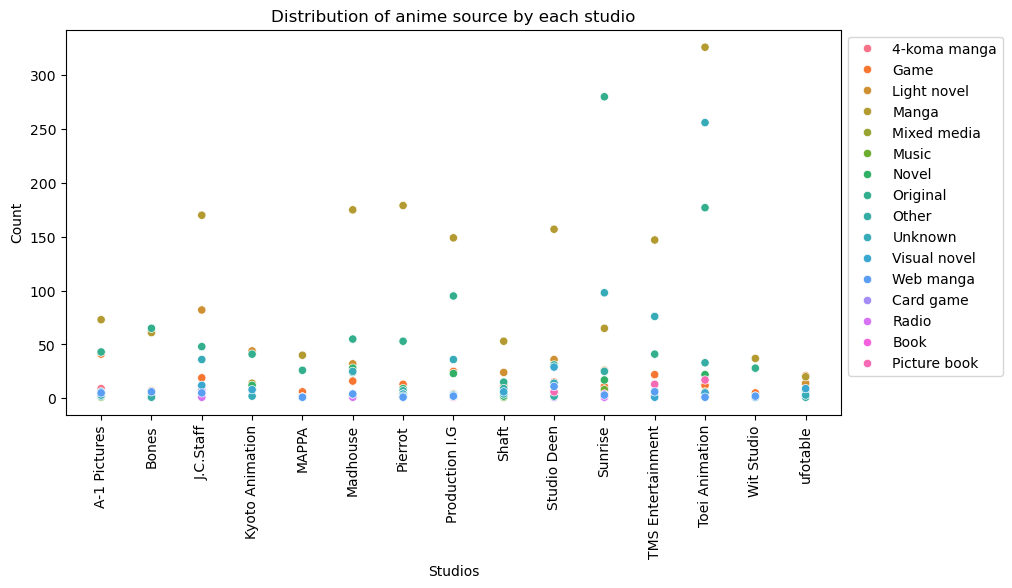

In [12]:
# Vẽ biểu đồ scatterplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Studios', y='Count', hue='Source', data=source_counts, ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of anime source by each studio')
plt.legend(bbox_to_anchor=(1, 1))
# Hiển thị biểu đồ
plt.show()

Nhận xét:
- Các studio đều có nguồn để sản xuất anime đa dạng.
- Hầu hết các studio đều chọn Manga làm nguồn để sản xuất anime nhiều nhất. Các nguồn được chọn nhiều tiếp theo là Original, Light novel, Visual novel.
- Các nguồn để sản xuất anime còn lại đều được sản xuất ở mức khá thấp so với các nguồn phổ biến, tuy nhiên có số lượng khá đồng đều nhau.
- Các studio lớn như Production I.G, J.C.Staff, MADHOUSE và Toei Animation có số lượng anime chuyển thể nhiều nhất, từ các nguồn đa dạng như manga, light novel, game, v.v. Điều này cho thấy họ có khả năng thích ứng với nhiều thể loại và phong cách khác nhau, cũng như có mối quan hệ tốt với các nhà xuất bản và nhà phát triển game.
- Các studio nhỏ hơn như Kyoto Animation, Shaft, ufotable và Wit Studio có số lượng anime chuyển thể ít hơn, nhưng chủ yếu là từ các nguồn riêng biệt như light novel, visual novel, web manga, v.v. Điều này cho thấy họ có sự chọn lọc và tập trung cao trong việc chuyển thể các tác phẩm có chất lượng và độc đáo, cũng như có phong cách nghệ thuật đặc trưng và nhận dạng.
- Các studio khác như Bones, MAPPA, Pierrot, A-1 Pictures và Sunrise có số lượng anime chuyển thể trung bình, từ các nguồn khác nhau, nhưng có xu hướng nhiều hơn về các thể loại như hành động, phiêu lưu, khoa học viễn tưởng, v.v. Điều này cho thấy họ có kinh nghiệm và năng lực trong việc chuyển thể các tác phẩm có yếu tố kịch tính và hấp dẫn, cũng như có kỹ thuật hoạt họa và hiệu ứng cao.

#### Trực quan số lượng và chất lượng

Đầu tiên cần tính tổng số bộ phim mà mỗi studio đã sản xuất.

In [13]:
total_anime = filtered_data['Studios'].value_counts()
print(total_anime)

Toei Animation       864
Sunrise              552
J.C.Staff            408
Madhouse             371
Production I.G       346
TMS Entertainment    341
Studio Deen          312
Pierrot              279
A-1 Pictures         234
Bones                152
Shaft                141
Kyoto Animation      129
MAPPA                 80
Wit Studio            80
ufotable              76
Name: Studios, dtype: int64


Tiếp theo, cần tính điểm trung bình các bộ phim của mỗi studio.

In [14]:
filtered_data = filtered_data.dropna(subset=['Score'])
avg_score_by_studio = filtered_data.groupby("Studios")['Score'].mean()
avg_score_by_studio

Studios
A-1 Pictures         7.117105
Bones                7.323919
J.C.Staff            6.772591
Kyoto Animation      7.315952
MAPPA                7.163243
Madhouse             6.923148
Pierrot              6.762519
Production I.G       6.992699
Shaft                7.052681
Studio Deen          6.918229
Sunrise              6.841954
TMS Entertainment    6.945070
Toei Animation       6.623422
Wit Studio           7.197945
ufotable             7.210282
Name: Score, dtype: float64

Cuối cùng, vẽ biểu đồ.

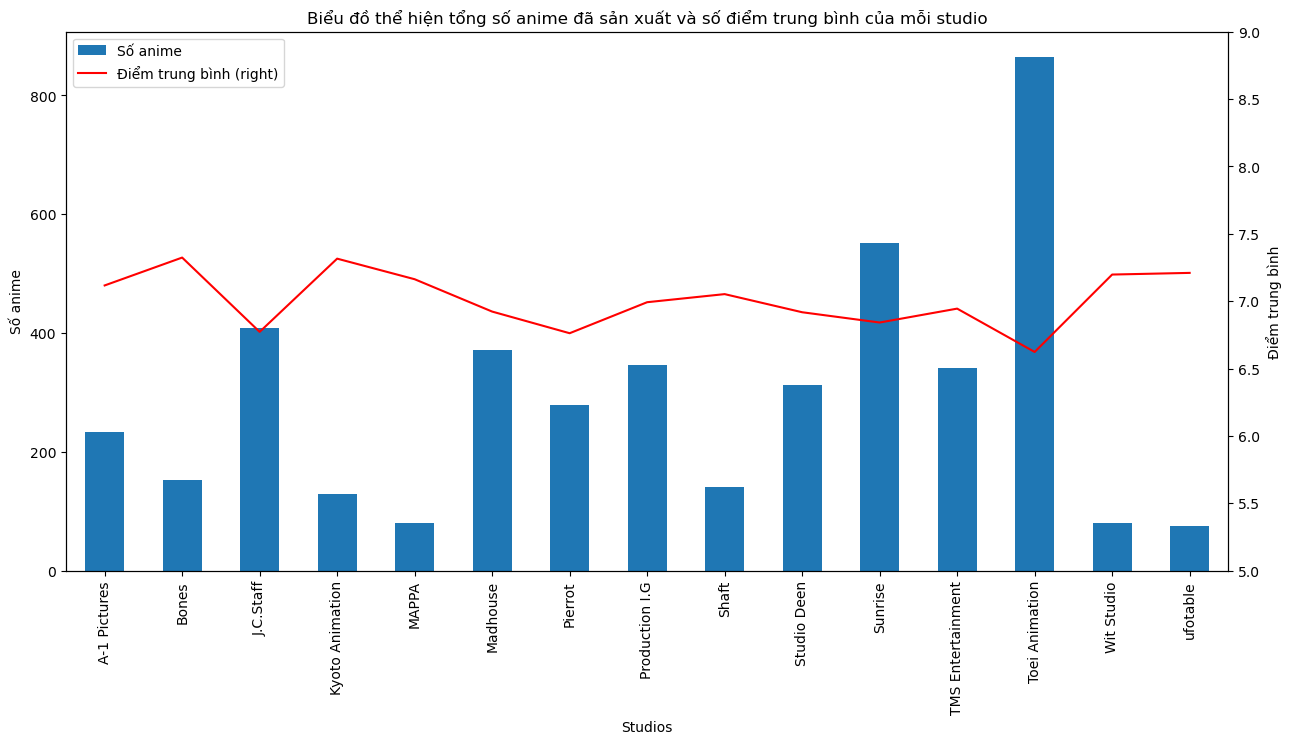

In [15]:
total_anime = total_anime.sort_index()
avg_score_by_studio = avg_score_by_studio.sort_index()
#Vẽ biểu đồ
fig, ax = plt.subplots(figsize = (15,7))

ax1 = total_anime.plot(kind='bar', rot = 90, label = 'Số anime')
ax2 = avg_score_by_studio.plot(secondary_y=True, rot = 90, color = 'r', label = 'Điểm trung bình')
ax2.set_ylim(5, 9)

#Vẽ 2 legend trên cùng 1 bảng
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
handles = h1+h2
labels = l1+l2
ax.legend(handles, labels, loc='upper left')

#Thêm title và xlabel, ylabel

plt.title("Biểu đồ thể hiện tổng số anime đã sản xuất và số điểm trung bình của mỗi studio")
ax1.set_ylabel("Số anime")
ax2.set_ylabel("Điểm trung bình")

plt.show()

Nhận xét:
- Chất lượng sản xuất anime của các studio khá đồng đều, với điểm trung bình đều nằm trong khoảng từ 6 đến 8.
- Có thể thấy sự chênh lệch về điểm số là do ảnh hưởng của số lượng sản xuất với xu hướng là: Các studio có số lượng anime sản xuất thấp thì có điểm trung bình cao hơn, còn các studio có số lượng anime sản xuất cao thì sẽ có điểm trung bình thấp hơn. 
- Tuy vậy, ta lại thấy sự nổi bật về chất lượng của studio Sunrise khi studio này vẫn giữ được điểm trung bình ở mức cao trong khi cũng có số lượng anime được sản xuất lớn. Sunrise có sự cân bằng giữa số lượng và chất lượng, chất lượng sản phẩm đồng đều và họ có nhiều thể loại và phong cách khác nhau.
- Các studio có điểm trung bình cao nhất là Bones, Kyoto Animation, Wit studio và ufotable đều có số lượng sản xuất thấp. Điều này cho thấy chiến lược của họ là chọn lọc và tập trung vào các tác phẩm có chất lượng và độc đáo thay vì chú ý đến số lượng.
- Các studio có số lượng anime sản xuất cao như Toei Animation, Pierrot, J.C.Staff, v.v. cho thấy chiến lược của họ là tập trung vào sản xuất các thể loại phổ biến, chú trọng vào lượng khán giả lớn và tăng cường mức độ phổ biến của họ đối với người xem anime.

#### Vẽ boxplot thể hiện điểm trung bình các phim của mỗi studio

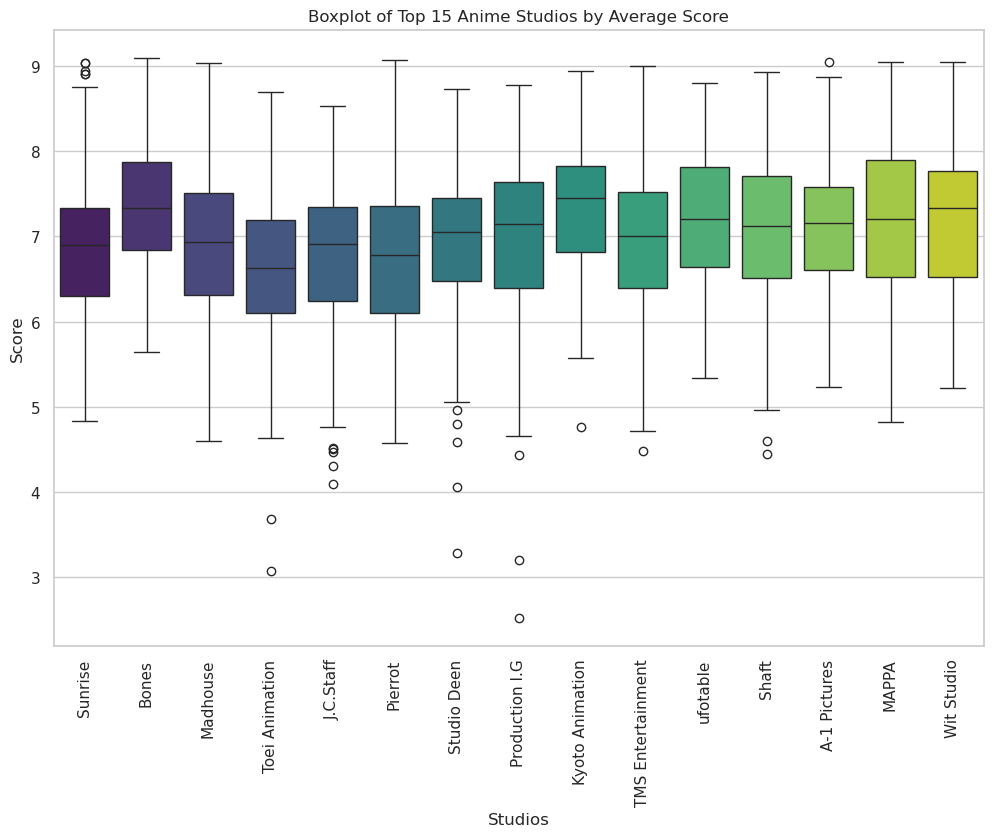

In [16]:
# Create a boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.boxplot(x='Studios', y='Score', data=filtered_data, hue='Studios', palette='viridis', dodge=False, legend=False)
plt.title('Boxplot of Top 15 Anime Studios by Average Score')
plt.xticks(rotation=90)
plt.show()

Nhận xét:
- Biểu đồ này cho ta cái nhìn sâu sắc hơn về chất lượng các tác phẩm của mỗi studio.
- Vì đây là top các studio hàng đầu nên chất lượng sản xuất anime của các studio khá đồng đều, với điểm trung bình nằm trong khoảng từ 6 đến 8. Tuy nhiên, cũng có một số outliers, cho thấy có những phim xuất sắc hoặc kém chất lượng.
- Sunrise và A-1 Pictures nổi bật với các tác phẩm có điểm số cao vượt trội (trên 9).
- Mặt khác, Studio Deen, Production I.G và J.C Staff lại có các phim có chất lượng thụt lùi, có điểm số khá tệ.
- Các studio như Pierrot, MAPPA và Wit Studio có phạm vi điểm rộng dù số bộ phim họ sản xuất ở mức trung bình và thấp, cho thấy sự chênh lệch lớn trong chất lượng sản phẩm của họ.
- Có thể thấy rằng các studio thành công này không sản xuất nhiều tác phẩm nhất hay có mức điểm trung bình cao nhất. Có thể nói rằng chất lượng công việc mà các studio này thực hiện mới khiến họ có được rất nhiều chương trình lọt vào top 1000 với điểm số tốt.

### Câu 2

### Câu 3

# PHẢN ÁNH

## 1. Bạn đã gặp những khó khăn gì?

### Hân

- Bước đặt câu hỏi là bước khó nhất sao cho câu hỏi hợp lý, có giá trị và không bị mơ hồ.
- Bước đầu phải xử lý lại bộ dữ liệu vì cột Studios có nhiều giá trị.
- Xác định tiêu chuẩn hợp lý cho các bộ phim tốt để lọc bộ dữ liệu.
- Xác định những cột dữ liệu cần thiết để trả lời câu hỏi, khó khăn trong việc khám phá và tìm ra các thống kê nổi bật để trả lời câu hỏi. Khó khăn trong việc chọn những phân tích và thống kê hợp lý nhất để trả lời cho câu hỏi của mình.
- Nhận xét khách quan và có giá trị dựa trên dữ liệu và thống kê.

### Khuê

### Tuấn

## 2. Bạn đã học được những gì

### Hân

- Đánh giá được ý nghĩa và giá trị của các bộ dữ liệu. Biết một bộ dữ liệu như thế nào là tốt và phù hợp.
- Có một số kinh nghiệm về tiền xử lý dữ liệu.
- Đặt được các câu hỏi có ý nghĩa về mật dữ liệu.
- Trình bày một báo cáo phân tích dữ liệu hoàn chỉnh.

### Khuê

### Tuấn

## 3. Nếu có nhiều thời gian hơn bạn sẽ làm gì?

- Thống kê thêm về phân bố Rating, Genres của các top-studio.
- Phân tích sự tương quan giữa các yếu tố như số lượng người xem, số lượng người yêu thích và điểm số của các studio. Phân tích mức độ phổ biến và mức độ tương tác của người xem.
- Phân tích sự ảnh hưởng của các studio đối với nhau. Tìm ra các studio có cùng nhà sản xuất, các studio đồng sản xuất phim... Điều này sẽ giúp hiểu được sự hợp tác và cạnh tranh giữa các studio.
